In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

print("Basic Info:")
print(df.info())

print("Missing Values:")
print(df.isnull().sum())

Dataset Loaded Successfully!

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Missing V

In [ ]:
df.drop("CustomerID", axis=1, inplace=True)

In [ ]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [ ]:
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
# Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Elbow Method to find optimal K
inertia_scores = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)


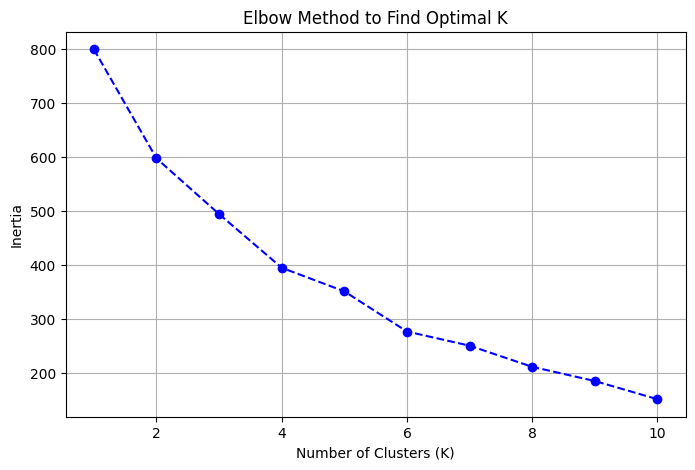

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia_scores, marker='o', linestyle='--', color='b')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# Fit K-Means with Optimal K
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df["Cluster"] = y_kmeans
print("K-Means Clustering Completed!")

K-Means Clustering Completed!


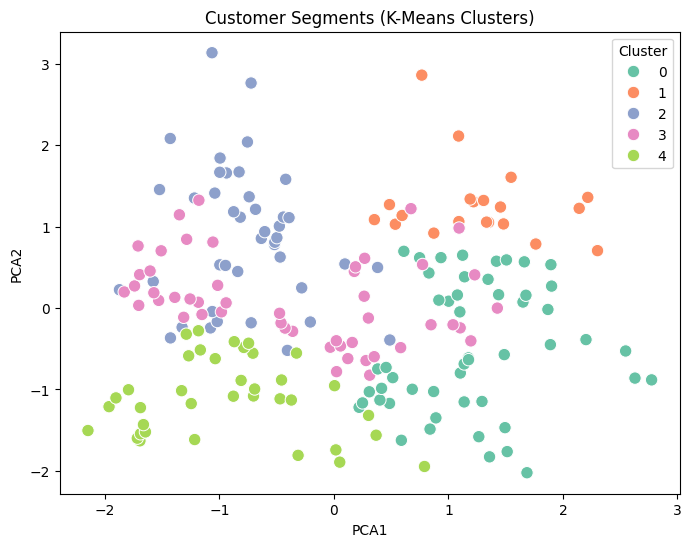

In [ ]:
# Visualize Clusters (using PCA for 2D)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2", s=80)
plt.title("Customer Segments (K-Means Clusters)")
plt.show()

In [ ]:
# Evaluate using Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.3f}")

# Analyze Cluster Characteristics
cluster_summary = df.groupby("Cluster").mean()
print("Cluster Summary:")
print(cluster_summary)

Silhouette Score: 0.272
Cluster Summary:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.490196  56.470588           46.098039               39.313725   
1        0.000000  39.500000           85.150000               14.050000   
2        0.000000  28.690476           60.904762               70.238095   
3        1.000000  37.897959           82.122449               54.448980   
4        1.000000  27.315789           38.842105               56.210526   

             PCA1      PCA2  
Cluster                      
0        1.196512 -0.509010  
1        1.254732  1.275794  
2       -0.771673  0.873183  
3       -0.373001  0.098257  
4       -0.932353 -1.080123  
